### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [12]:
import yfinance as yf
# Extract Tesla's stock data from yfinance
tesla_data = yf.download('TSLA')
# Reset the index to ensure it's clean
tesla_data = tesla_data.reset_index(drop=True)
# Save the cleaned DataFrame to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)
# Display the first five rows of the DataFrame
tesla_data_head = tesla_data.head()
print(tesla_data_head)

[*********************100%***********************]  1 of 1 completed

       Open      High       Low     Close  Adj Close     Volume
0  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


###  Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

# Set the URL and headers to simulate a browser request
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36"
}

# Send a GET request with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    print("Request successful!")
    html_data = response.text
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Locate the table using its class name
tesla_revenue_table = soup.find("table", {"class": "historical_data_table table"})

# Extract data from the table rows
rows = tesla_revenue_table.find_all("tr")
revenue_data = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure there are two columns (Date and Revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Avoid empty revenue entries
            revenue_data.append([date, float(revenue)])

# Create a DataFrame from the scraped data
tesla_revenue = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])

# Display the last five rows of the DataFrame
tesla_revenue_tail = tesla_revenue.tail()
print(tesla_revenue_tail)

Request successful!
    Date  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [17]:
import yfinance as yf
import pandas as pd
#Use yfinance to Extract Stock Data for GameStop (GME)
gme_data = yf.download('GME')
##Reset the index, save, and display the first five rows
gme_data = gme_data.reset_index(drop=True)  # Reset the index
# Save the DataFrame to a CSV file
gme_data.to_csv('gme_data.csv', index=False)  # Save without the index column
# Display the first five rows of the DataFrame
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

      Open     High      Low    Close  Adj Close    Volume
0  2.40625  2.51500  2.38125  2.51250   1.691666  76216000
1  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [18]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Set the URL for GME revenue data from MacroTrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Simulate a browser request by setting headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36"
}

# Send a GET request with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    print("Request successful!")
    html_data = response.text
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    exit()  # Exit if the request failed

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Locate the revenue table using its class name
gme_revenue_table = soup.find("table", {"class": "historical_data_table table"})

# Extract the data from the table rows
rows = gme_revenue_table.find_all("tr")
revenue_data = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure there are two columns (Date and Revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Avoid empty revenue entries
            revenue_data.append([date, float(revenue)])

# Create a DataFrame from the scraped data
gme_revenue = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])

# Display the last five rows of the DataFrame
gme_revenue_tail = gme_revenue.tail()
print(gme_revenue_tail)


Request successful!
    Date  Revenue
11  2013   8887.0
12  2012   9551.0
13  2011   9474.0
14  2010   9078.0
15  2009   8806.0


### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

[*********************100%***********************]  1 of 1 completed


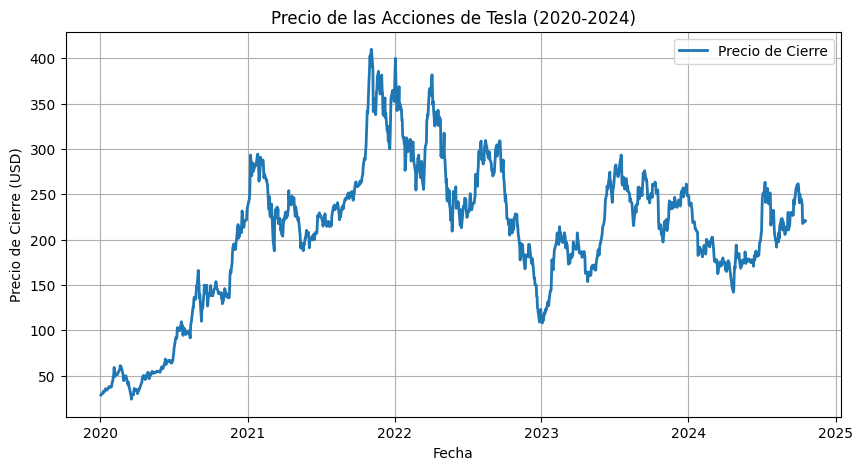

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Extraer los datos de Tesla (TSLA) desde yfinance
tesla_data = yf.download('TSLA', start='2020-01-01', end='2024-10-19')

# Definir la función para crear y mostrar la gráfica
def make_graph(data, title):
    plt.figure(figsize=(10, 5))  # Establecer el tamaño de la gráfica
    plt.plot(data.index, data['Close'], label='Precio de Cierre', linewidth=2)  # Graficar los precios de cierre
    plt.title(title)  # Agregar un título
    plt.xlabel('Fecha')  # Etiqueta del eje X
    plt.ylabel('Precio de Cierre (USD)')  # Etiqueta del eje Y
    plt.legend()  # Mostrar la leyenda
    plt.grid(True)  # Agregar la cuadrícula
    plt.show()  # Mostrar la gráfica

# Llamar a la función con los datos de Tesla y un título adecuado
make_graph(tesla_data, "Precio de las Acciones de Tesla (2020-2024)")



### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.


[*********************100%***********************]  1 of 1 completed


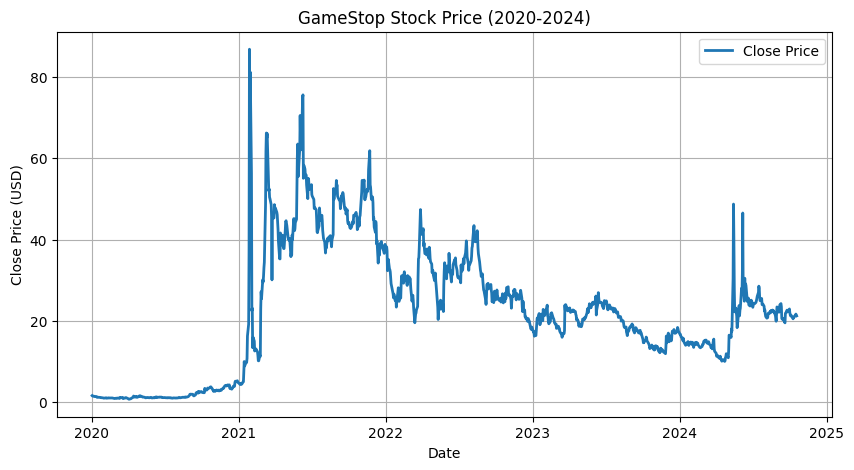

In [23]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Extract GameStop stock data from yfinance
gme_data = yf.download('GME', start='2020-01-01', end='2024-10-19')

# Define the function to create and display the graph
def make_graph(data, title):
    plt.figure(figsize=(10, 5))  # Set the graph size
    plt.plot(data.index, data['Close'], label='Close Price', linewidth=2)  # Plot 'Close' prices
    plt.title(title)  # Add a title to the graph
    plt.xlabel('Date')  # Label the x-axis
    plt.ylabel('Close Price (USD)')  # Label the y-axis
    plt.legend()  # Show the legend
    plt.grid(True)  # Add a grid
    plt.show()  # Display the graph

# Call the function with GME data and a title
make_graph(gme_data, "GameStop Stock Price (2020-2024)")
